In [50]:
import numpy as np
import cv2
from skimage.measure import compare_ssim as ssim
from matplotlib import pyplot as plt
import pywt
import os
import sys
import scipy.io

In [51]:
def convo(img,filter1,dim):
    s=np.zeros(dim*dim)
    l=0
    r=np.zeros((3,3))
    for i in range(0,dim-2):
        for j in range(0,dim-2):
            a1 =img[i,j]
            a2 =img[i,j+1]
            a3 =img[i,j+2]
            a4 =img[i+1,j]
            a5 =img[i+1,j+1]
            a6 =img[i+1,j+2]
            a7 =img[i+2,j]
            a8 =img[i+2,j+1]
            a9 =img[i+2,j+2]
            k=np.array([[a1,a2,a3],[a4,a5,a6],[a7,a8,a9]])
        
            r=np.multiply(k,filter1)
            s[l]=np.sum(r)
            l=l+1
    z=np.reshape(s,(dim,dim))     
    return z

In [93]:
def mini_l0_norm(A,y):    
    x = np.zeros((A.shape[1], 1))
    residue = y
    
    while np.linalg.norm(residue) > 1.6:

        #Projection coefficients of residue on columns of A
        column_norms = np.linalg.norm(A, axis = 0, ord = 2).reshape(-1,1)
    
        #projection_coeffs = np.divide(A.T @ residue , column_norms)
        projection_coeffs = A.T @ residue
        #minimum difference coefficient
        #print(A.shape, residue.shape, projection)
        #min_norm_coeff, min_norm_ind = min_norm(A, residue, projection_coeffs)
        
        key_coeff = np.argmax((projection_coeffs), axis = 0)
        max_coeff = projection_coeffs[key_coeff]
        
        #Updating residue
        residue = residue - max_coeff * A[:, key_coeff]
        
        #Assigning to x
        x[key_coeff] += max_coeff
        
    return x

In [52]:
im = cv2.imread('Task4.tif',0)

    

In [53]:
def res(im):
    x=0
    y=0
    arr=np.zeros((128,128))
    for n in range(63):
        y=0
        x=x+2
        for m in range(63):
            arr[y][x]=im[m][n]
            arr[y][x+1]=im[m][n]
            y=y+1
            arr[y][x]=im[m][n]
            arr[y][x+1]=im[m][n]
            y=y+1
    return arr

In [54]:
image=res(im)

In [55]:
filter1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
filter2=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [56]:
horizontal1=convo(image,filter1,128)

In [57]:
vertical1=convo(image,filter2,128)

In [58]:
horizontal2=convo(horizontal1,filter1,128)

In [59]:
vertical2=convo(vertical1,filter2,128)

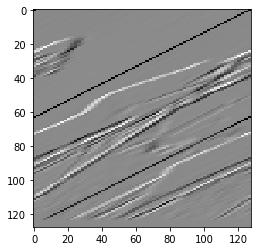

In [60]:
plt.imshow(horizontal1,'gray')

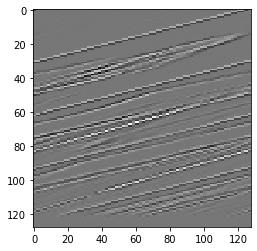

In [61]:
plt.imshow(horizontal2,'gray')

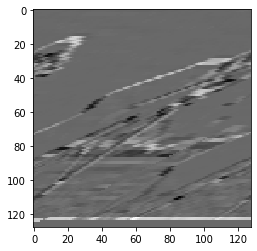

In [62]:
plt.imshow(vertical1,'gray')

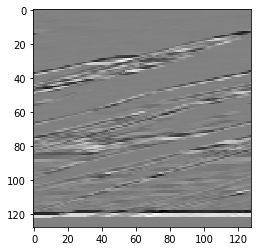

In [63]:
plt.imshow(vertical2,'gray')

In [64]:
x=range(0,128)

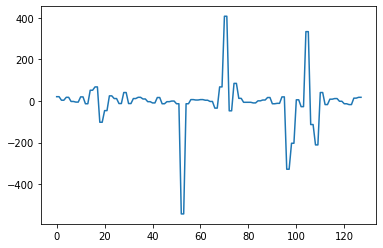

In [65]:
plt.plot(x,horizontal1[100,:])

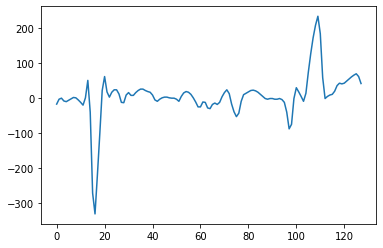

In [66]:
plt.plot(x,vertical1[100,:])


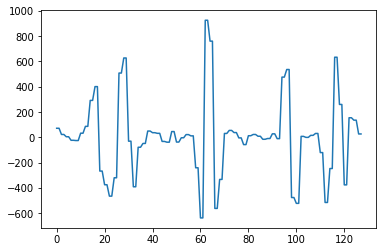

In [67]:
plt.plot(x,horizontal2[100,:])

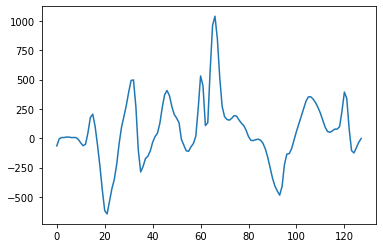

In [27]:
plt.plot(x,vertical2[100,:])

Sparse of every 5*5 patch

In [37]:
variables = scipy.io.loadmat('Dictionary.mat')

In [41]:
d=variables['Dl']

In [87]:
pic=np.zeros((5,5))

In [100]:
vineeth=np.zeros((512))

In [88]:
o=np.zeros((25,25,512))

In [108]:
o=o.reshape(625,512)
o=o.transpose()

In [119]:
pics=np.zeros((100,1))
for i in range(0,25):
    for j in range(0,25):
        k=i*5
        l=j*5
        pic=image[k:k+5][l:l+5]
        h1=convo(pic,filter1,5)
        v1=convo(pic,filter2,5)
        h2=convo(pic,filter1,5)
        v2=convo(pic,filter2,5)
        pics[0:25,0]=h1.resize((25,1))
        pics[25:50,0]=h2.resize((25,1))
        pics[50:75,0]=v1.resize((25,1))
        pics[75:100,0]=v2.resize((25,1))
        vineeth=mini_l0_norm(d,pics)
        o[:,i*25+j]=vineeth
        
        
                                              
                                              
                                              



  

ValueError: could not broadcast input array from shape (512,1) into shape (512)

158.0